# Cálculo de $\mathrm{d} W_{\text{elást-x}}$

Nota: Es muy importante tener en cuenta que el diferencial du no está implementado en MAXIMA, por lo que debe ponerse mucho cuidado en la interpretación de los resultados que arroja el siguiente programa:

In [1]:
from sympy import init_printing, latex, symbols, Function, diff, simplify, expand, collect
# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

In [2]:
x, y, deltax, deltay, dx, dy, dz = symbols('x, y, Delta_x, Delta_y, dx, dy, dz')

In [20]:
# Se especifica que sx, txy, u y X son funciones dependientes de x y y
sx  = Function('sigma_x')(x,y)
txy = Function(r'\tau_{xy}')(x,y)
u   = Function(r'd\mathit{u}')(x,y)
X   = Function('X')(x,y)

In [21]:
# Se define la linealización con una serie de Taylor
linealizar = lambda f,deltax,deltay : f + diff(f,x)*deltax + diff(f,y)*deltay

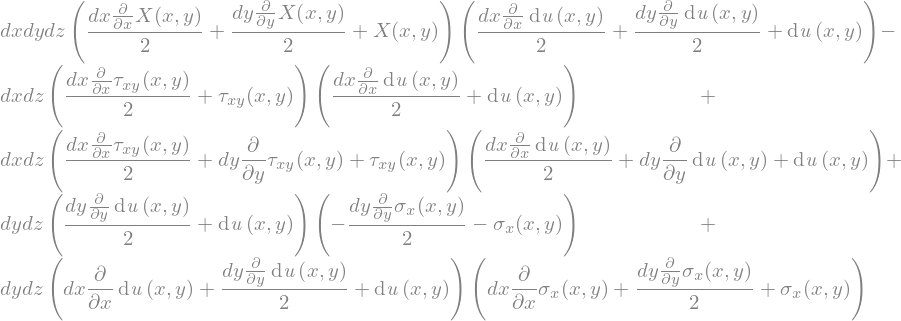

In [22]:
eq1 = -linealizar(sx,  0   , dy/2)*dy*dz    * linealizar(u, 0   , dy/2)\
      +linealizar(sx,  dx  , dy/2)*dy*dz    * linealizar(u, dx  , dy/2)\
      -linealizar(txy, dx/2, 0)   *dx*dz    * linealizar(u, dx/2, 0   )\
      +linealizar(txy, dx/2, dy)  *dx*dz    * linealizar(u, dx/2, dy  )\
      +linealizar(X,   dx/2, dy/2)*dx*dy*dz * linealizar(u, dx/2, dy/2)

eq1

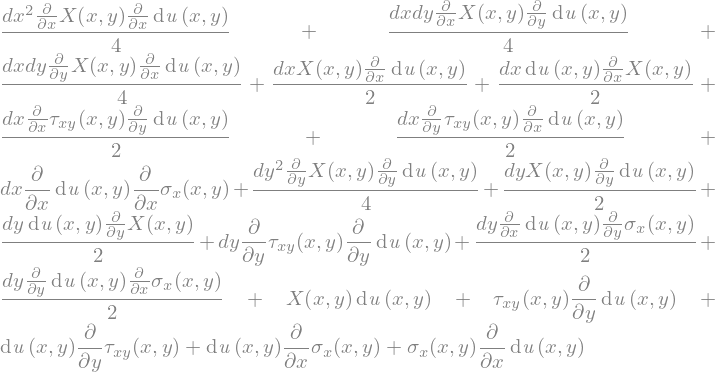

In [23]:
# Se "factoriza" dx*dy*dz
eq2 = expand(eq1/(dx*dy*dz))

eq2

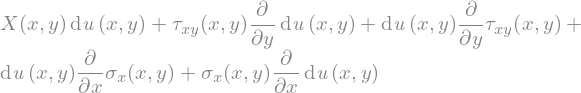

In [24]:
# Se toman límites cuando dx, dy y dz tienden a cero
eq3 = eq2.subs({dx:0, dy:0, dz:0})

eq3

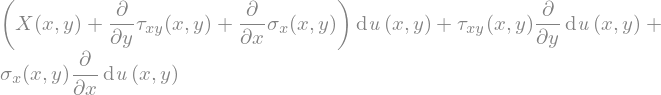

In [25]:
# Se factoriza el término u
eq4 = collect(eq3, u)

eq4

Finalmente, en el resultado anterior debe tenerse en cuenta que la derivada y el diferencial son intercambiables, y que se usa la ecuación diferencial de equilibrio para elimiar el término entre paréntesis.